### IMPORT LIBRARIES

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier, plot_tree



In [2]:

##read data from csv file
df1 = pd.read_csv('./Desktop/Dataset/heart.csv')

display (df1.head())

##removes nan and incorrect data
d = df1 ['ca'] != 4
df1 = df1[d]
df1 = df1[df1['thal'] != 0]
print(df1.shape)

##convert pandas to numpy (array)
df = df1.to_numpy()

## Split the data into inputs (X) and output (Y)
X = df[:, :13] 
Y = df[:, -1]   

print ('_'*50)
print ('X = features')
display (X [0:5])
print ('_'*50)
print ('y = target')
display (Y [0:5])


##split X and Y into train and test set

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

print ( 'train set:' +str (X_train.shape) +'\n' '\n'+  'test set:' +str(X_test.shape))

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


(296, 14)
__________________________________________________
X = features


array([[ 63. ,   1. ,   3. , 145. , 233. ,   1. ,   0. , 150. ,   0. ,
          2.3,   0. ,   0. ,   1. ],
       [ 37. ,   1. ,   2. , 130. , 250. ,   0. ,   1. , 187. ,   0. ,
          3.5,   0. ,   0. ,   2. ],
       [ 41. ,   0. ,   1. , 130. , 204. ,   0. ,   0. , 172. ,   0. ,
          1.4,   2. ,   0. ,   2. ],
       [ 56. ,   1. ,   1. , 120. , 236. ,   0. ,   1. , 178. ,   0. ,
          0.8,   2. ,   0. ,   2. ],
       [ 57. ,   0. ,   0. , 120. , 354. ,   0. ,   1. , 163. ,   1. ,
          0.6,   2. ,   0. ,   2. ]])

__________________________________________________
y = target


array([1., 1., 1., 1., 1.])

train set:(236, 13)

test set:(60, 13)


### Implement the Decision Tree classifier.

In [3]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth=3, random_state=0) # criterion='entropy', defaults to gini with no argument
clf = clf.fit(X_train, y_train)

In [4]:
print('trained tree')
print(clf.feature_importances_)

trained tree
[0.         0.         0.26047873 0.         0.         0.
 0.         0.05001901 0.         0.13885182 0.         0.36712805
 0.18352238]


In [5]:
#predict the test cases

##predicting with the x_test
print('predicting the classes for each test sample')
y_pred = clf.predict(X_test)
print(y_pred)
print('true classes')
print(y_test)

##prediction probability
pred_prob = clf.predict_proba(X_test[1].reshape(1,-1))
print('prediction probability', pred_prob)
print(X_test[1])

##number of mislabelled points
print("Number of mislabeled points out of a total %d points : %d"
      % (y_test.shape[0],(y_test != y_pred).sum()))

predicting the classes for each test sample
[0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0.
 0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 0.
 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0.]
true classes
[0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 1. 0.
 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 0.
 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0.]
prediction probability [[1. 0.]]
[ 64.    1.    0.  120.  246.    0.    0.   96.    1.    2.2   0.    1.
   2. ]
Number of mislabeled points out of a total 60 points : 11


### Visualize the learned decision tree

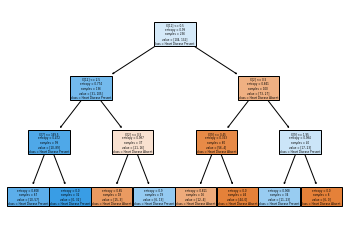

In [6]:
##Plotting the Tree using plt.show, resolution is poor
c_names = {0:'Heart Disease Absent', 1:'Heart Disease Present'}
tree.plot_tree(clf, filled=True, class_names=c_names)
plt.show()

In [7]:
#Plotting the Tree using graphviz and rendering to pdf OR png. resolution is much better

##create dictionary for the features
feature_names={0:'age',1:'gender',2:'cp',3:'rbp',4:'chol',5:'fbs',6:'recg',7:'hr',8:'ang',9:'st',
               10:'peak',11:'vessels',12:'thal'} 

##create dictionary for class names
c_names={0: 'Healthy Patient', 1: 'Heart Disease Patient'} 

##used for better visualization of tree
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None, feature_names=feature_names, class_names=c_names) 
graph = graphviz.Source(dot_data) 


##display(graph) ##to display on jupyter
graph.render("heart_tree", view ='true', format = 'pdf') ##change format to png to render on png



'heart_tree.pdf'

###  Draw or screenshot the tree for d=3 and d=5 and write down the path.

In [8]:
##For maximum depth = 3

clf3 = tree.DecisionTreeClassifier(criterion = 'gini', max_depth=3, random_state=0) 
clf3 = clf3.fit(X_train, y_train)
dot_data3 = tree.export_graphviz(clf3, out_file=None, feature_names=feature_names, class_names=c_names,
                                 filled=True, rounded=True,special_characters=True) 
graph1 = graphviz.Source(dot_data3) 
#display(graph) ##to display on jupyter
graph1.render("heart_tree with maximum depht=3", view ='true', format = 'pdf') ##change format to png to render on png



'heart_tree with maximum depht=3.pdf'

In [114]:
##For maximum depth = 5

clf5 = tree.DecisionTreeClassifier(criterion = 'gini', max_depth=5, random_state=0)
clf5 = clf5.fit(X_train, y_train)
dot_data5 = tree.export_graphviz(clf5, out_file=None, feature_names=feature_names, class_names=c_names,
                                 filled=True, rounded=True,special_characters=True) 
graph2 = graphviz.Source(dot_data5) 
#display(graph) ##to display on jupyter
graph2.render("heart_tree with maximum depht=5", view ='true', format = 'pdf') ##change format to png to render on png







See attached pdf document heart_tree with maximum depht=5.


### Write down the path.

In [115]:

print ('''

THE PATH FOR DEPTH =3

''')

from skompiler import skompile
rules = (skompile(clf3.predict))

feature_names={0:'age',1:'gender',2:'cp',3:'rbp',4:'chol',5:'fbs',6:'recg',7:'hr',8:'ang',9:'st',
               10:'peak',11:'vessels',12:'thal'} 
rules=str(rules)
for index,feature_name in feature_names.items():
    rules=rules.replace("x["+str(index)+"]", feature_name)
##print(rules)


c_names={0: 'Healthy Patient', 1: 'Heart Disease Patient'} 

for index,class_name in c_names.items():
    rules=rules.replace("then "+str(index), "then "+str(class_name))
    rules=rules.replace("else "+str(index),"else "+ str(class_name))
print(rules)


print ('''    



 OR


''')

from sklearn.tree.export import export_text

rules = export_text(clf3, feature_names)
   
print(rules)





THE PATH FOR DEPTH =3


(if (vessels <= 0.5) then (if (thal <= 2.5) then (if (st <= 3.549999952316284) then Heart Disease Patient else Healthy Patient) else (if (cp <= 0.5) then Healthy Patient else Heart Disease Patient)) else (if (cp <= 0.5) then (if (st <= 0.45000001788139343) then Healthy Patient else Healthy Patient) else (if (st <= 1.949999988079071) then Heart Disease Patient else Healthy Patient)))
    



 OR



|--- vessels <= 0.50
|   |--- thal <= 2.50
|   |   |--- st <= 3.55
|   |   |   |--- class: 1.0
|   |   |--- st >  3.55
|   |   |   |--- class: 0.0
|   |--- thal >  2.50
|   |   |--- cp <= 0.50
|   |   |   |--- class: 0.0
|   |   |--- cp >  0.50
|   |   |   |--- class: 1.0
|--- vessels >  0.50
|   |--- cp <= 0.50
|   |   |--- st <= 0.45
|   |   |   |--- class: 0.0
|   |   |--- st >  0.45
|   |   |   |--- class: 0.0
|   |--- cp >  0.50
|   |   |--- st <= 1.95
|   |   |   |--- class: 1.0
|   |   |--- st >  1.95
|   |   |   |--- class: 0.0



In [116]:

print ('''

THE PATH FOR DEPTH =5

''')



from skompiler import skompile
rules = (skompile(clf5.predict))

feature_names={0:'age',1:'gender',2:'cp',3:'rbp',4:'chol',5:'fbs',6:'recg',7:'hr',8:'ang',9:'st',
               10:'peak',11:'vessels',12:'thal'} 
rules=str(rules)
for index,feature_name in feature_names.items():
    rules=rules.replace("x["+str(index)+"]", feature_name)
##print(rules)


c_names={0: 'Healthy Patient', 1: 'Heart Disease Patient'} 

for index,class_name in c_names.items():
    rules=rules.replace("then "+str(index), "then "+str(class_name))
    rules=rules.replace("else "+str(index),"else "+ str(class_name))
print(rules)


print ('''    



 OR


''')

from sklearn.tree.export import export_text

rules = export_text(clf5, feature_names)
   
print(rules)







THE PATH FOR DEPTH =5


(if (vessels <= 0.5) then (if (thal <= 2.5) then (if (st <= 3.549999952316284) then (if (hr <= 83.5) then Healthy Patient else (if (chol <= 272.0) then Heart Disease Patient else Heart Disease Patient)) else Healthy Patient) else (if (cp <= 0.5) then (if (st <= 0.6500000059604645) then (if (age <= 50.5) then Healthy Patient else Heart Disease Patient) else Healthy Patient) else (if (hr <= 132.5) then Healthy Patient else (if (age <= 39.0) then Healthy Patient else Heart Disease Patient)))) else (if (cp <= 0.5) then (if (st <= 0.45000001788139343) then (if (gender <= 0.5) then Heart Disease Patient else (if (hr <= 106.5) then Heart Disease Patient else Healthy Patient)) else Healthy Patient) else (if (st <= 1.949999988079071) then (if (hr <= 120.5) then Healthy Patient else (if (gender <= 0.5) then Heart Disease Patient else Heart Disease Patient)) else Healthy Patient)))
    



 OR



|--- vessels <= 0.50
|   |--- thal <= 2.50
|   |   |--- st <= 3.55
|   |   

## Accuracy and prediction with depth. Vary the depth of the tree from d=3 to d=12

### Print the TRAINING accuracy and the TEST accuracy for each depth. 

In [117]:

from sklearn.metrics import confusion_matrix

max_depth = range(3,13)

for md in max_depth:
    print('For Depth', md)
    clf_range = tree.DecisionTreeClassifier(criterion = 'gini', max_depth = md, random_state=0)
    clf_range = clf_range.fit(X_train, y_train)
    y_pred = clf_range.predict(X_test)
    #print (y_pred)
    
    
    cm_test = confusion_matrix(y_pred, y_test)
    #print(cm_test)
    #print()
    print('Accuracy for TEST set for Decision Tree = {}'.format((np.trace(cm_test))/len(y_test)))
    

    y_predTrain_3f = clf_range.predict(X_train)
    
    cm_test3 = confusion_matrix(y_predTrain_3f, y_train)
    #print('The confusion matrix for TRAIN set is\n',cm_test3)
    #print()
    print('Accuracy for TRAIN set for Decision Tree = {}'.format((np.trace(cm_test3))/len(y_train)))
    print ('\n')
  



print ('''

The greater the depth of the tree, the higher the train set accuracy

The accuray of the test set drops to 0.76 at depth 8 and then increases the larger the depth.



''')

For Depth 3
Accuracy for TEST set for Decision Tree = 0.8166666666666667
Accuracy for TRAIN set for Decision Tree = 0.8601694915254238


For Depth 4
Accuracy for TEST set for Decision Tree = 0.8166666666666667
Accuracy for TRAIN set for Decision Tree = 0.8940677966101694


For Depth 5
Accuracy for TEST set for Decision Tree = 0.8166666666666667
Accuracy for TRAIN set for Decision Tree = 0.9152542372881356


For Depth 6
Accuracy for TEST set for Decision Tree = 0.8166666666666667
Accuracy for TRAIN set for Decision Tree = 0.923728813559322


For Depth 7
Accuracy for TEST set for Decision Tree = 0.8
Accuracy for TRAIN set for Decision Tree = 0.9576271186440678


For Depth 8
Accuracy for TEST set for Decision Tree = 0.7666666666666667
Accuracy for TRAIN set for Decision Tree = 0.9661016949152542


For Depth 9
Accuracy for TEST set for Decision Tree = 0.8
Accuracy for TRAIN set for Decision Tree = 0.9915254237288136


For Depth 10
Accuracy for TEST set for Decision Tree = 0.816666666666666

### Determine the output probability of a patient with the following 13 attributes: X_patient = [57,0,1,130,236,0,0,174,0,0,1,1,2]

In [118]:
max_depth = range(3,13)
X_patient = [57,0,1,130,236,0,0,174,0,0,1,1,2]
for md in max_depth:
    print('For Depth', md)
    clf_range = tree.DecisionTreeClassifier(criterion = 'gini', max_depth = md, random_state=0)
    clf_range = clf_range.fit(X_train, y_train)
    X_patient_proba = clf_range.predict_proba(np.array(X_patient).reshape(1,-1))
    print ('The Probabilities for Heart disease or not on X_patient are \n',X_patient_proba)
    print ('\n')
    

For Depth 3
The Probabilities for Heart disease or not on X_patient are 
 [[0.32352941 0.67647059]]


For Depth 4
The Probabilities for Heart disease or not on X_patient are 
 [[0.25806452 0.74193548]]


For Depth 5
The Probabilities for Heart disease or not on X_patient are 
 [[0.07692308 0.92307692]]


For Depth 6
The Probabilities for Heart disease or not on X_patient are 
 [[0. 1.]]


For Depth 7
The Probabilities for Heart disease or not on X_patient are 
 [[0. 1.]]


For Depth 8
The Probabilities for Heart disease or not on X_patient are 
 [[0. 1.]]


For Depth 9
The Probabilities for Heart disease or not on X_patient are 
 [[0. 1.]]


For Depth 10
The Probabilities for Heart disease or not on X_patient are 
 [[0. 1.]]


For Depth 11
The Probabilities for Heart disease or not on X_patient are 
 [[0. 1.]]


For Depth 12
The Probabilities for Heart disease or not on X_patient are 
 [[0. 1.]]




### What is the depth, corresponding classification accuracy and confusion matrix that gives best test performance?

In [119]:

from sklearn.metrics import confusion_matrix

max_depth = range(3,13)

for md in max_depth:
    print('For Depth', md)
    clf_range = tree.DecisionTreeClassifier(criterion = 'gini', max_depth = md, random_state=0)
    clf_range = clf_range.fit(X_train, y_train)
    y_pred = clf_range.predict(X_test)
    #print (y_pred)
    
    
    cm_test = confusion_matrix(y_pred, y_test)
    print('The confusion matrix for TEST set is\n',cm_test)
    #print()
    print('Accuracy for TEST set for Decision Tree = {}'.format((np.trace(cm_test))/len(y_test)))
    
    y_predTrain_3f = clf_range.predict(X_train)
    
    cm_test3 = confusion_matrix(y_predTrain_3f, y_train)
    print('The confusion matrix for TRAIN set is\n',cm_test3)
    #print()
    print('Accuracy for TRAIN set for Decision Tree = {}'.format((np.trace(cm_test3))/len(y_train)))
    print ('\n')




For Depth 3
The confusion matrix for TEST set is
 [[24  3]
 [ 8 25]]
Accuracy for TEST set for Decision Tree = 0.8166666666666667
The confusion matrix for TRAIN set is
 [[ 78   7]
 [ 26 125]]
Accuracy for TRAIN set for Decision Tree = 0.8601694915254238


For Depth 4
The confusion matrix for TEST set is
 [[24  3]
 [ 8 25]]
Accuracy for TEST set for Decision Tree = 0.8166666666666667
The confusion matrix for TRAIN set is
 [[ 84   5]
 [ 20 127]]
Accuracy for TRAIN set for Decision Tree = 0.8940677966101694


For Depth 5
The confusion matrix for TEST set is
 [[23  2]
 [ 9 26]]
Accuracy for TEST set for Decision Tree = 0.8166666666666667
The confusion matrix for TRAIN set is
 [[ 85   1]
 [ 19 131]]
Accuracy for TRAIN set for Decision Tree = 0.9152542372881356


For Depth 6
The confusion matrix for TEST set is
 [[24  3]
 [ 8 25]]
Accuracy for TEST set for Decision Tree = 0.8166666666666667
The confusion matrix for TRAIN set is
 [[ 88   2]
 [ 16 130]]
Accuracy for TRAIN set for Decision Tree

###  From the analysis above, Depth 3  gives the best test performance

## select 3 features from the data, vary the depth from d=3 to d=12

### the 3 features selected are                                                                                                  feature 7: thalach , feature 9: oldpeak, feature 11: ca

In [120]:
## Recreating dataset using 3 features of my choice

df2 = df1.iloc [:,[7,9,11, -1]] 
display (df2.head())

df2 = df2.to_numpy() ##convert to numpy

## Split the data into inputs (X) and output (Y)
X = df2[:, 0:-1]
Y = df2[:, -1]   
print (df2.shape)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

print ( 'train set:' +str (X_train.shape) +'\n' '\n'+  'test set:' +str(X_test.shape))




,thalach,oldpeak,ca,target
0,150,2.3,0,1
1,187,3.5,0,1
2,172,1.4,0,1
3,178,0.8,0,1
4,163,0.6,0,1


(296, 4)
train set:(236, 3)

test set:(60, 3)


### Print the TRAINING and TEST accuracy for each depth.

In [121]:

max_depth = range(3,13)
for md in max_depth:
    print('For Depth', md)
    clf_3f = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth=md, random_state=0) 
    clf_3f = clf_3f.fit(X_train, Y_train)
    
    
    
    y_pred_3f = clf_3f.predict(X_test)
    #print (y_pred_3f)
    cm_test2 = confusion_matrix(y_pred_3f, Y_test)
    #print('The confusion matrix for TEST set is\n',cm_test2)
    #print()
    print('Accuracy for TEST set for Decision Tree = {}'.format((np.trace(cm_test2))/len(Y_test)))

    
    y_predTrain_3f = clf_3f.predict(X_train)
    cm_test3 = confusion_matrix(y_predTrain_3f, Y_train)
    #print('The confusion matrix for TRAIN set is\n',cm_test3)
    #print()
    print('Accuracy for TRAIN set for Decision Tree = {}'.format((np.trace(cm_test3))/len(Y_train)))
    print ('\n')

For Depth 3
Accuracy for TEST set for Decision Tree = 0.7833333333333333
Accuracy for TRAIN set for Decision Tree = 0.788135593220339


For Depth 4
Accuracy for TEST set for Decision Tree = 0.7833333333333333
Accuracy for TRAIN set for Decision Tree = 0.8135593220338984


For Depth 5
Accuracy for TEST set for Decision Tree = 0.7666666666666667
Accuracy for TRAIN set for Decision Tree = 0.8305084745762712


For Depth 6
Accuracy for TEST set for Decision Tree = 0.75
Accuracy for TRAIN set for Decision Tree = 0.864406779661017


For Depth 7
Accuracy for TEST set for Decision Tree = 0.75
Accuracy for TRAIN set for Decision Tree = 0.8983050847457628


For Depth 8
Accuracy for TEST set for Decision Tree = 0.75
Accuracy for TRAIN set for Decision Tree = 0.9194915254237288


For Depth 9
Accuracy for TEST set for Decision Tree = 0.7666666666666667
Accuracy for TRAIN set for Decision Tree = 0.9279661016949152


For Depth 10
Accuracy for TEST set for Decision Tree = 0.7666666666666667
Accuracy fo

### Accuracy drops when only 3 features (oldpeak, st, vessels,) are used!    <br> The tree used vessels, thal, st, cp as the features. 

## Decision surfaces:                                                                                                                                                   Plot the decision surface of a decision tree with the combination of 3 features you chose for the three cases: [0,1],[0,2],[1,2]. 

In [122]:
##Using Feature 7,9 &11

# Parameters
n_classes = 2
plot_colors = "yb"
plot_step = 0.02
print (X_train.shape)


clf_3f = tree.DecisionTreeClassifier(criterion = 'gini', max_depth=3, random_state=0) 
clf_3f = clf_3f.fit(X_train, Y_train)


#plot the DT
f_names={0:'hr',1:'st',2:'vessels'} 

c_names = {0:'Heart Disease Absent', 1:'Heart Disease Present'}

dot_data6 = tree.export_graphviz(clf_3f, out_file=None, feature_names=list(f_names.values()), 
                                 class_names=list(c_names.values()),
                                 filled=True, rounded=True,special_characters=True) 
graph4 = graphviz.Source(dot_data6) 
#display(graph) ##to display on jupyter
graph4.render("heart_tree with 3 features", view ='true', format = 'pdf') ##change format to png to render on png





(236, 3)
See attached pdf document heart_tree with 3 features.


,thalach,oldpeak,ca,target
0,150,2.3,0,1
1,187,3.5,0,1
2,172,1.4,0,1
3,178,0.8,0,1
4,163,0.6,0,1


(296, 4)


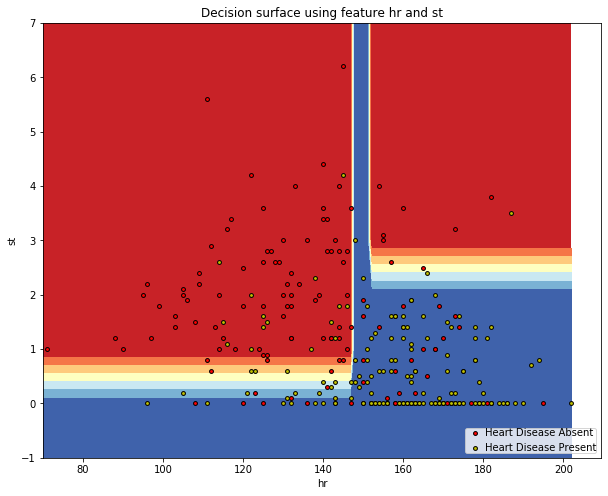

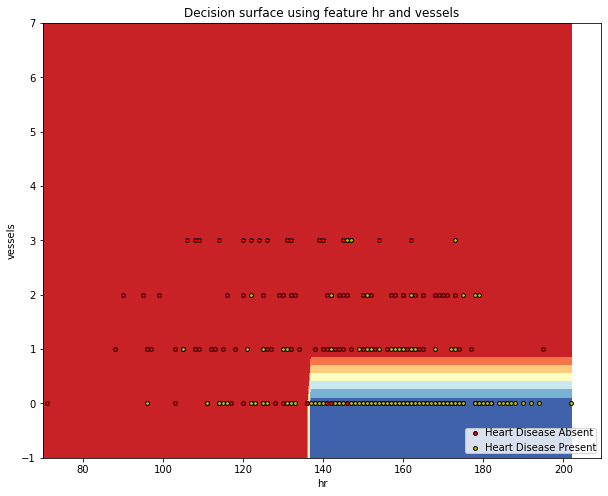

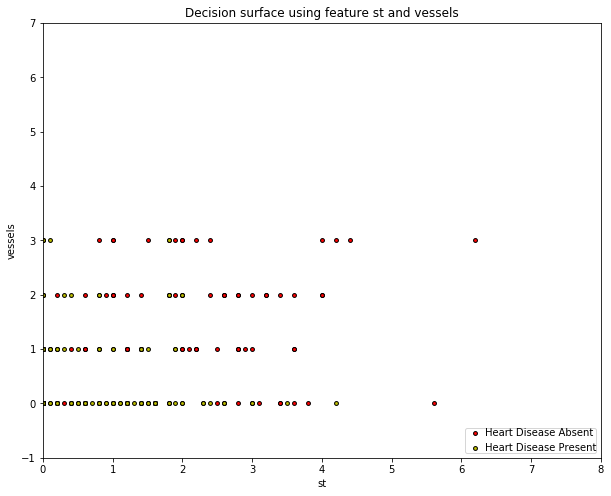

In [86]:
# Parameters
n_classes = 2
plot_colors = "ryb"
plot_step = 1



#read the data file, and convert the mappings (i.e. target classes)

df3 = df1.iloc [:,[7,9,11, -1]] 
display (df3.head())

df3 = df3.to_numpy() ##convert to numpy

## Split the data into inputs (X) and output (Y)
dataset  = df3[:, 0:-1]
target = df3[:, -1]  

X = dataset
Y = target
print (df3.shape)

f_names={0:'hr',1:'st',2:'vessels'} 

c_names = {0:'Heart Disease Absent', 1:'Heart Disease Present'}

for counter, feats in enumerate([[0,1], [0,2], [1,2]]):

    clf7 = DecisionTreeClassifier(max_depth=3).fit(X[:,feats], Y)



    #plot the boundaries of DT
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                          np.arange(y_min, y_max, plot_step))


    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf7.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(f_names[feats[0]])
    plt.ylabel(f_names[feats[1]])

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(Y == i)
        plt.scatter(X[idx, feats[0]], X[idx, feats[1]], c=color, label=c_names[i],
                    cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

    plt.title("Decision surface using feature " + f_names[feats[0]] + " and " + f_names[feats[1]])
    plt.legend(loc='lower right', borderpad=0, handletextpad=0)
    plt.axis("tight")
    fig=plt.gcf()

    if counter==2:
        ax=plt.gca()
        ax.set_xlim(0, 8)
        
    fig.set_size_inches(10,8)
    plt.show()

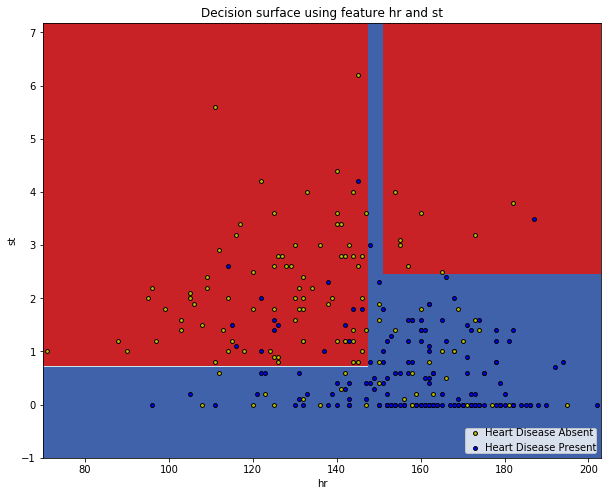

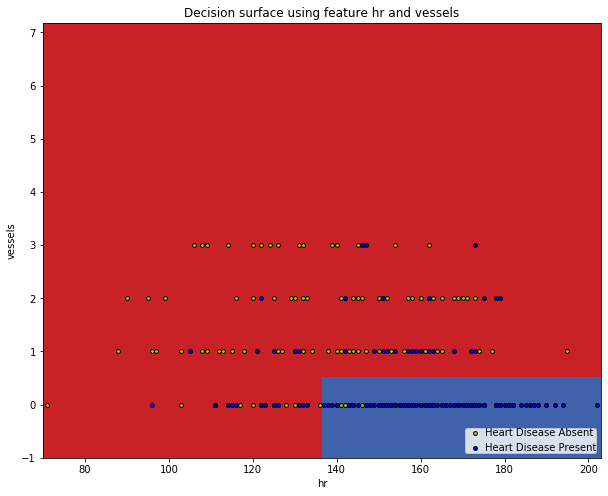

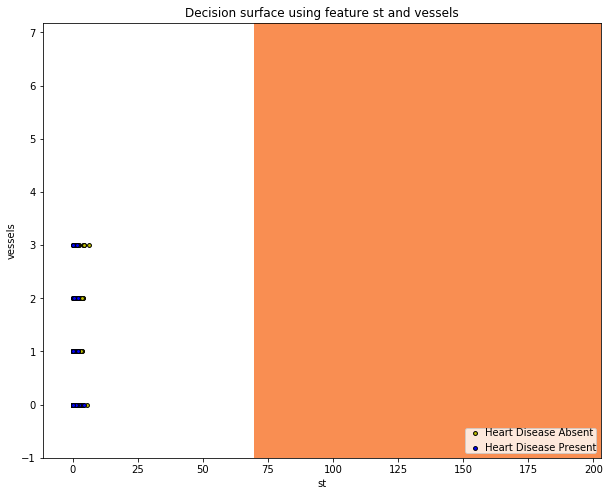

In [123]:
X = dataset
y = target
for feats in [[0,1], [0,2], [1,2]]:
    # We only take the two corresponding features

    # Train
    clf7 = DecisionTreeClassifier(max_depth=3).fit(X[:, feats], y)

    # Plot the decision boundary
#     plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf7.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(f_names[feats[0]])
    plt.ylabel(f_names[feats[1]])

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(Y == i)
        plt.scatter(X[idx, feats[0]], X[idx, feats[1]], c=color, label=c_names[i],
                    cmap=plt.cm.RdYlBu, edgecolor='black', s=15)


    plt.title("Decision surface using feature " + f_names[feats[0]] + " and " + f_names[feats[1]])
    plt.legend(loc='lower right', borderpad=0, handletextpad=0)
    plt.axis("tight")
    fig=plt.gcf()
    fig.set_size_inches(10,8)
    plt.show()



## What assumptions did I make for this model?

### The node with the largest information gain is used as the root node and is best used for splitting. ScikitLearn uses CART (Classification and Regression Trees) which is very similar to C4.5.CART constructs binary trees using the feature and threshold that yield the largest information gain at each node.



##  why max_depth for the model should be specfied.

### <b>We should specify max_depth in order to prevent overfitting, which is more likely to occur when we have few number of training examples compared to number of leaf nodes.</b>

## What other approaches, or modifications could we have done in your decision tree model? In other words, what parameters can we change? 

### To reduce overfitting, pruning can be done (not currently supported), setting the minimum number of samples required at a leaf node or setting the maximum depth of the tree are necessary to avoid this problem.
